#### THE GENERAL REQUIRMENTS #####

Total number of users: 250
Total number of items: 5

Ratings per product:
item_id
movie1    243
movie2    230
movie3    227
movie4    231
movie5    232
Name: rating, dtype: int64


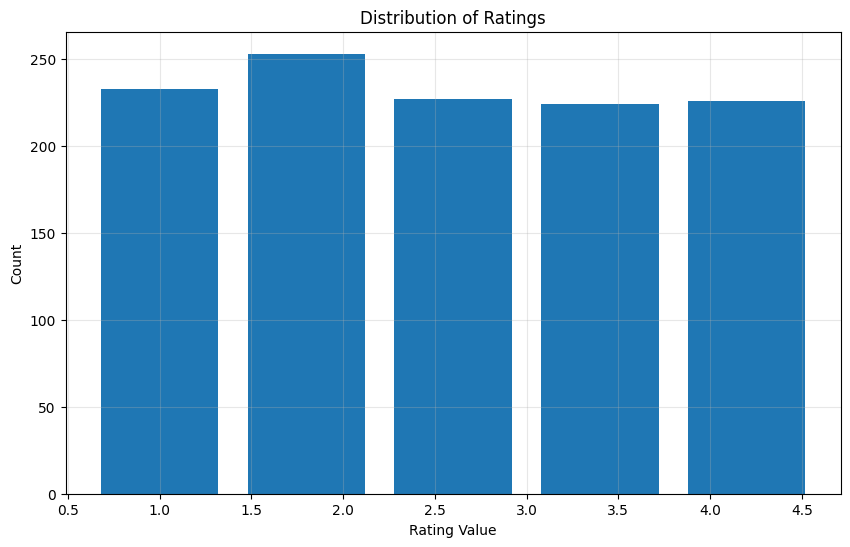


Sparsity of the matrix: 6.96%
Average rating: 2.96
Rating standard deviation: 1.41


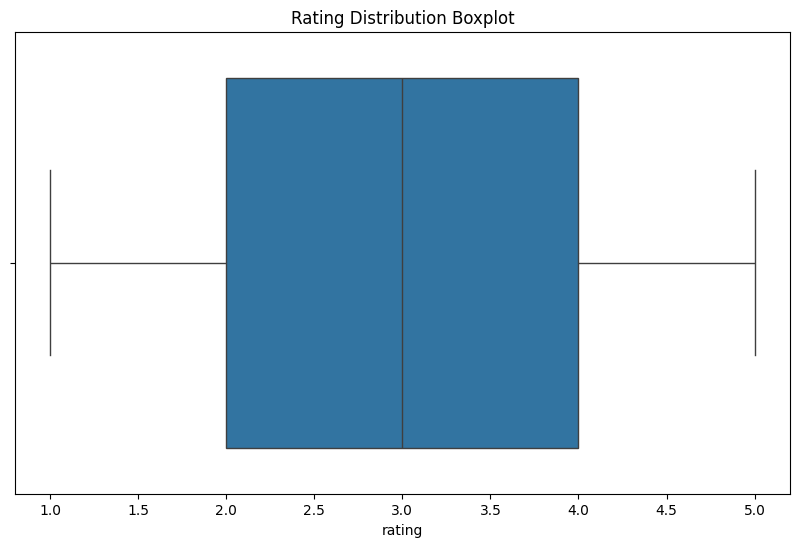


Two lowest rated items:
item_id
movie5    2.913793
movie4    2.917749
Name: rating, dtype: float64


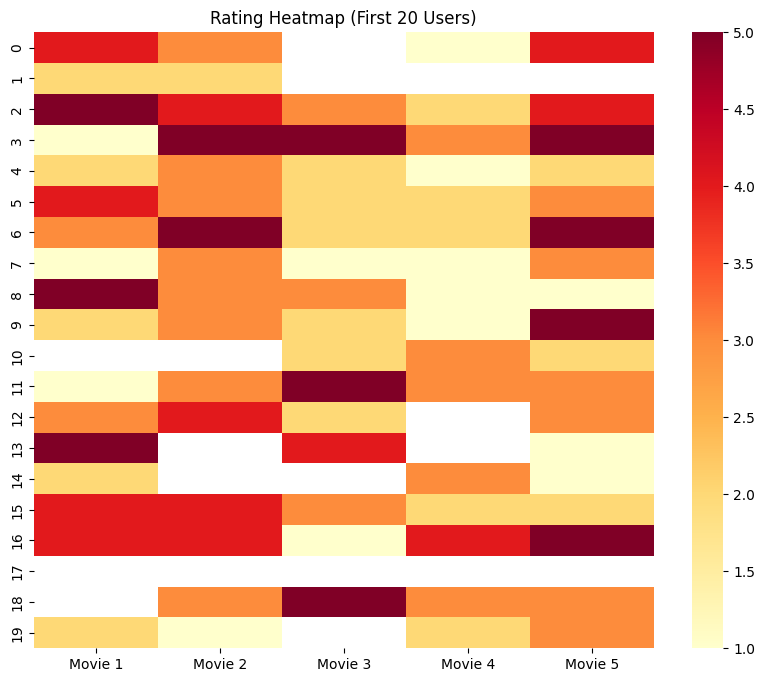


Results have been saved to 'assignment_results.pkl' and 'assignment_results.txt'


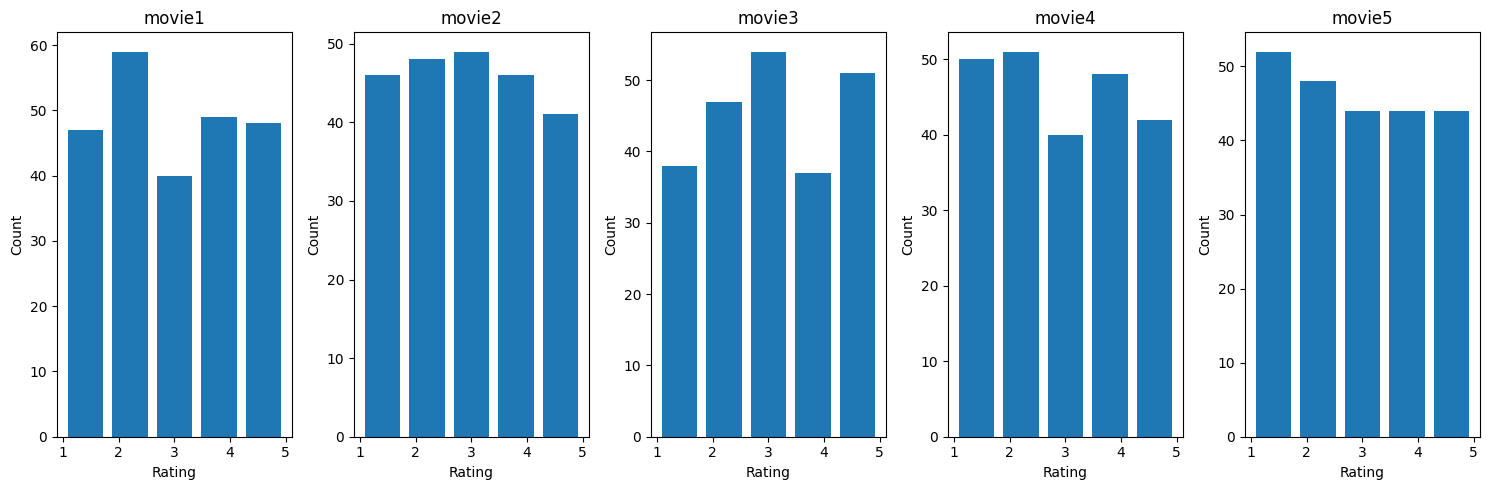

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

df = pd.read_csv('userMovie.csv')  


df_melted = df.melt(id_vars=['userid'], 
                    value_vars=['movie1', 'movie2', 'movie3', 'movie4', 'movie5'],
                    var_name='item_id', 
                    value_name='rating')


Tnu = len(df['userid'].unique())
print(f"Total number of users: {Tnu}")


Tni = 5  
print(f"Total number of items: {Tni}")


ratings_per_product = df_melted.groupby('item_id')['rating'].count()
print("\nRatings per product:")
print(ratings_per_product)


plt.figure(figsize=(10,6))
plt.hist(df_melted['rating'], bins=5, rwidth=0.8, align='left')
plt.title('Distribution of Ratings')
plt.xlabel('Rating Value')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()


total_possible_ratings = Tnu * Tni
actual_ratings = df_melted['rating'].count()
sparsity = 1 - (actual_ratings/total_possible_ratings)
print(f"\nSparsity of the matrix: {sparsity:.2%}")


average_rating = df_melted['rating'].mean()
rating_std = df_melted['rating'].std()
print(f"Average rating: {average_rating:.2f}")
print(f"Rating standard deviation: {rating_std:.2f}")


plt.figure(figsize=(10,6))
sns.boxplot(x=df_melted['rating'])
plt.title('Rating Distribution Boxplot')
plt.show()


average_item_ratings = df_melted.groupby('item_id')['rating'].mean()
lowest_rated = average_item_ratings.nsmallest(2)
i1, i2 = lowest_rated.index
print("\nTwo lowest rated items:")
print(lowest_rated)


plt.figure(figsize=(10,8))
rating_matrix = df.iloc[:, 1:].values  
sns.heatmap(rating_matrix[:20], cmap='YlOrRd', 
            xticklabels=['Movie 1', 'Movie 2', 'Movie 3', 'Movie 4', 'Movie 5'])
plt.title('Rating Heatmap (First 20 Users)')
plt.show()


results = {
    'Tnu': Tnu,
    'Tni': Tni,
    'ratings_per_product': ratings_per_product,
    'sparsity': sparsity,
    'average_rating': average_rating,
    'rating_std': rating_std,
    'target_items': [i1, i2],
    'lowest_rated_items_avg': lowest_rated
}


with open('assignment_results.pkl', 'wb') as f:
    pickle.dump(results, f)


with open('assignment_results.txt', 'w') as f:
    f.write(f"Total number of users (Tnu): {Tnu}\n")
    f.write(f"Total number of items (Tni): {Tni}\n")
    f.write(f"Sparsity: {sparsity:.2%}\n")
    f.write(f"Average rating: {average_rating:.2f}\n")
    f.write(f"Rating standard deviation: {rating_std:.2f}\n")
    f.write(f"Target items (lowest rated): {[i1, i2]}\n")
    f.write("\nRatings per movie:\n")
    f.write(ratings_per_product.to_string())
    f.write("\n\nAverage ratings per movie:\n")
    f.write(average_item_ratings.to_string())

print("\nResults have been saved to 'assignment_results.pkl' and 'assignment_results.txt'")

plt.figure(figsize=(15,5))
for i, movie in enumerate(['movie1', 'movie2', 'movie3', 'movie4', 'movie5'], 1):
    plt.subplot(1,5,i)
    plt.hist(df[movie], bins=5, rwidth=0.8)
    plt.title(f'{movie}')
    plt.xlabel('Rating')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

                                                                    PART1                                                                           

Average ratings for target items:
movie5: 2.91
movie4: 2.92

Average rating for each item:
movie1    2.967078
movie2    2.947826
movie3    3.070485
movie4    2.917749
movie5    2.913793
dtype: float64

Covariance Matrix:
          movie1    movie2    movie3    movie4    movie5
movie1  1.958782  0.039218 -0.032070  0.055048  0.091910
movie2  0.039218  1.772586 -0.163683 -0.028408  0.134444
movie3 -0.032070 -0.163683  1.762539 -0.101663 -0.061942
movie4  0.055048 -0.028408 -0.101663  1.869226  0.039112
movie5  0.091910  0.134444 -0.061942  0.039112  1.904722


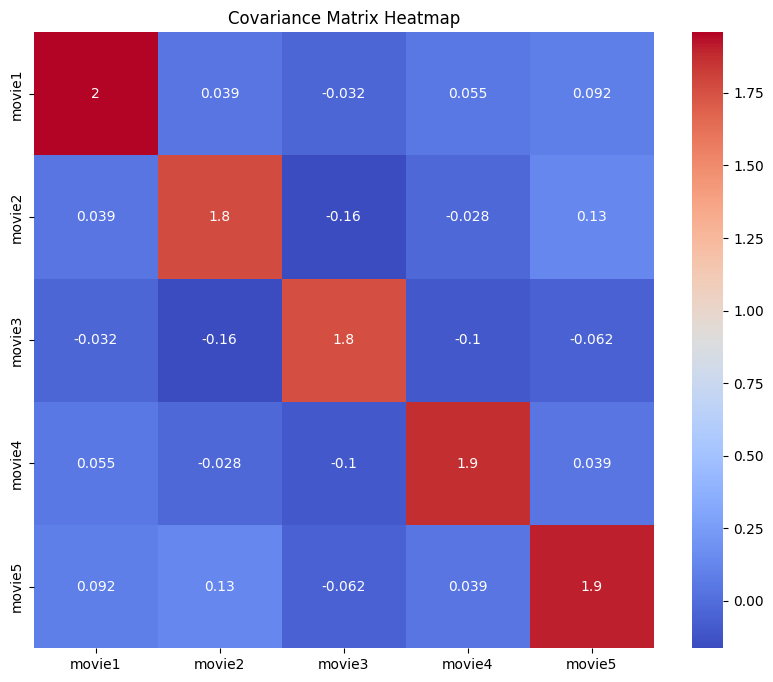


Top 5 peers:
movie5: ['movie2', 'movie1', 'movie3', 'movie4']
movie4: ['movie3', 'movie1', 'movie5', 'movie2']

Top 10 peers:
movie5: ['movie2', 'movie1', 'movie3', 'movie4']
movie4: ['movie3', 'movie1', 'movie5', 'movie2']

Prediction Comparison:

Target Item movie5:
5-peer prediction average: 0.00
10-peer prediction average: 0.00

Target Item movie4:
5-peer prediction average: 0.00
10-peer prediction average: 0.00


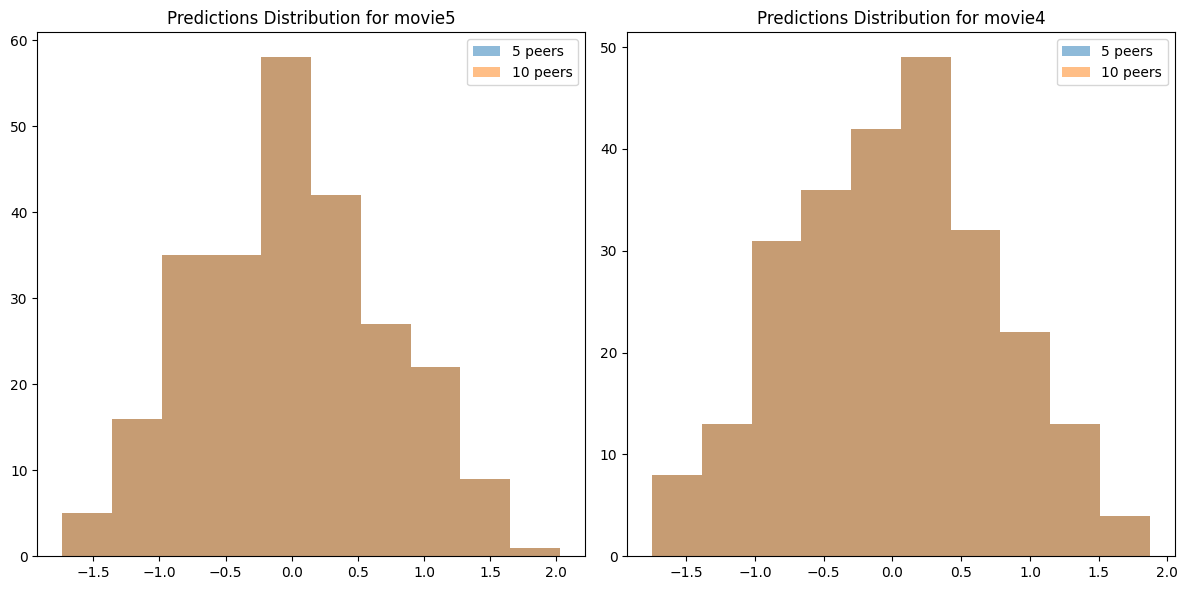

NameError: name 'part1_results' is not defined

In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


def pca_mean_filling_analysis(df):
    # Remove userid column for calculations
    rating_matrix = df.iloc[:, 1:].values
    
    # 3.2.1 Calculate average rating for target items (I1 and I2)
    target_means = {
        i1: df[i1].mean(),
        i2: df[i2].mean()
    }
    print(f"Average ratings for target items:")
    print(f"{i1}: {target_means[i1]:.2f}")
    print(f"{i2}: {target_means[i2]:.2f}")

    # 3.2.2 Mean-filling for target items using SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    df_filled = pd.DataFrame(imputer.fit_transform(df.iloc[:, 1:]), 
                           columns=df.iloc[:, 1:].columns)

    # 3.2.3 Calculate average rating for each item
    item_means = df_filled.mean()
    print("\nAverage rating for each item:")
    print(item_means)

    # 3.2.4 Calculate differences from mean
    centered_ratings = df_filled - item_means

    # 3.2.5 & 3.2.6 Compute covariance matrix
    cov_matrix = centered_ratings.cov()
    print("\nCovariance Matrix:")
    print(cov_matrix)

    # Visualize covariance matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cov_matrix, annot=True, cmap='coolwarm')
    plt.title('Covariance Matrix Heatmap')
    plt.show()

    # 3.2.7 Determine top 5 and 10 peers for target items
    def get_top_peers(item, n_peers):
        cov_with_item = abs(cov_matrix[item])
        return cov_with_item.nlargest(n_peers + 1)[1:].index.tolist()

    top_5_peers = {
        i1: get_top_peers(i1, 5),
        i2: get_top_peers(i2, 5)
    }
    
    top_10_peers = {
        i1: get_top_peers(i1, 10),
        i2: get_top_peers(i2, 10)
    }

    print("\nTop 5 peers:")
    print(f"{i1}: {top_5_peers[i1]}")
    print(f"{i2}: {top_5_peers[i2]}")
    
    print("\nTop 10 peers:")
    print(f"{i1}: {top_10_peers[i1]}")
    print(f"{i2}: {top_10_peers[i2]}")

    # 3.2.8 & 3.2.9 Compute reduced dimensional space and predictions (5 peers)
    def compute_predictions(target_item, peers, ratings):
        pca = PCA(n_components=len(peers))
        peer_ratings = ratings[peers]
        
        # Ensure no NaN values
        peer_ratings_clean = peer_ratings.fillna(peer_ratings.mean())
        
        pca.fit(peer_ratings_clean)
        
        # Transform the data
        transformed_data = pca.transform(peer_ratings_clean)
        
        # Reconstruct and predict
        reconstructed = pca.inverse_transform(transformed_data)
        
        # Use correlation with peers to predict target item
        weights = np.abs(cov_matrix.loc[target_item, peers])
        weights = weights / weights.sum()
        
        predictions = np.dot(reconstructed, weights)
        return predictions

    # Predictions using 5 peers
    predictions_5_peers = {
        i1: compute_predictions(i1, top_5_peers[i1], centered_ratings),
        i2: compute_predictions(i2, top_5_peers[i2], centered_ratings)
    }

    # 3.2.10 & 3.2.11 Compute predictions using 10 peers
    predictions_10_peers = {
        i1: compute_predictions(i1, top_10_peers[i1], centered_ratings),
        i2: compute_predictions(i2, top_10_peers[i2], centered_ratings)
    }

    # 3.2.12 Compare results
    print("\nPrediction Comparison:")
    print(f"\nTarget Item {i1}:")
    print(f"5-peer prediction average: {predictions_5_peers[i1].mean():.2f}")
    print(f"10-peer prediction average: {predictions_10_peers[i1].mean():.2f}")
    
    print(f"\nTarget Item {i2}:")
    print(f"5-peer prediction average: {predictions_5_peers[i2].mean():.2f}")
    print(f"10-peer prediction average: {predictions_10_peers[i2].mean():.2f}")

    # Visualization of predictions comparison
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.hist(predictions_5_peers[i1], alpha=0.5, label='5 peers')
    plt.hist(predictions_10_peers[i1], alpha=0.5, label='10 peers')
    plt.title(f'Predictions Distribution for {i1}')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.hist(predictions_5_peers[i2], alpha=0.5, label='5 peers')
    plt.hist(predictions_10_peers[i2], alpha=0.5, label='10 peers')
    plt.title(f'Predictions Distribution for {i2}')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

    # Save results
    results = {
        'target_means': target_means,
        'item_means': item_means,
        'covariance_matrix': cov_matrix,
        'top_5_peers': top_5_peers,
        'top_10_peers': top_10_peers,
        'predictions_5_peers': predictions_5_peers,
        'predictions_10_peers': predictions_10_peers
    }

    return results

# Run the analysis
results = pca_mean_filling_analysis(df)

# Save results to file
with open('part1_results.txt', 'w') as f:
    f.write("PCA Analysis Results\n\n")
    f.write("Target Items Mean Ratings:\n")
    for item, mean in results['target_means'].items():
        f.write(f"{item}: {mean:.2f}\n")
    
    f.write("\nItem Means:\n")
    f.write(results['item_means'].to_string())
    
    f.write("\n\nTop 5 Peers:\n")
    for item, peers in results['top_5_peers'].items():
        f.write(f"{item}: {peers}\n")
    
    f.write("\nTop 10 Peers:\n")
    for item, peers in results['top_10_peers'].items():
        f.write(f"{item}: {peers}\n")

                                                                             PART2                                                                  

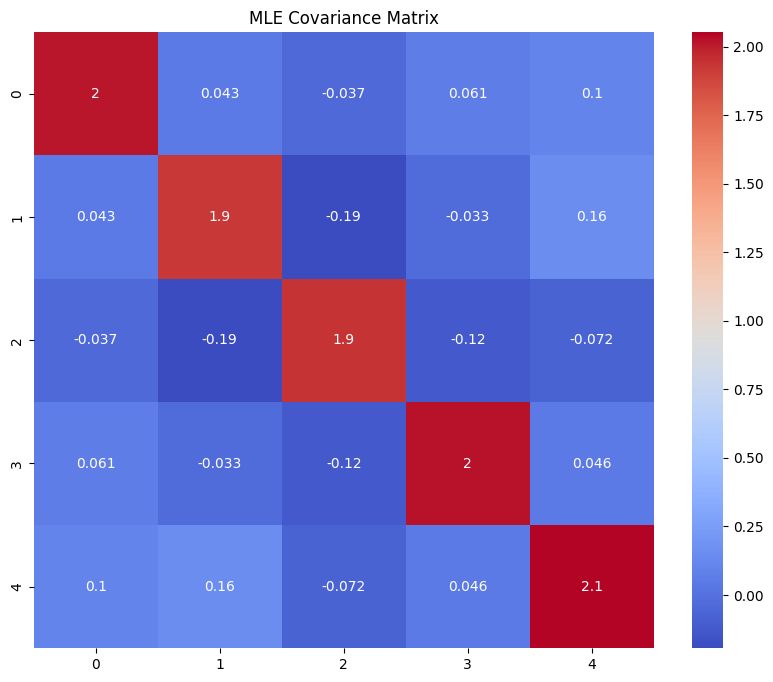

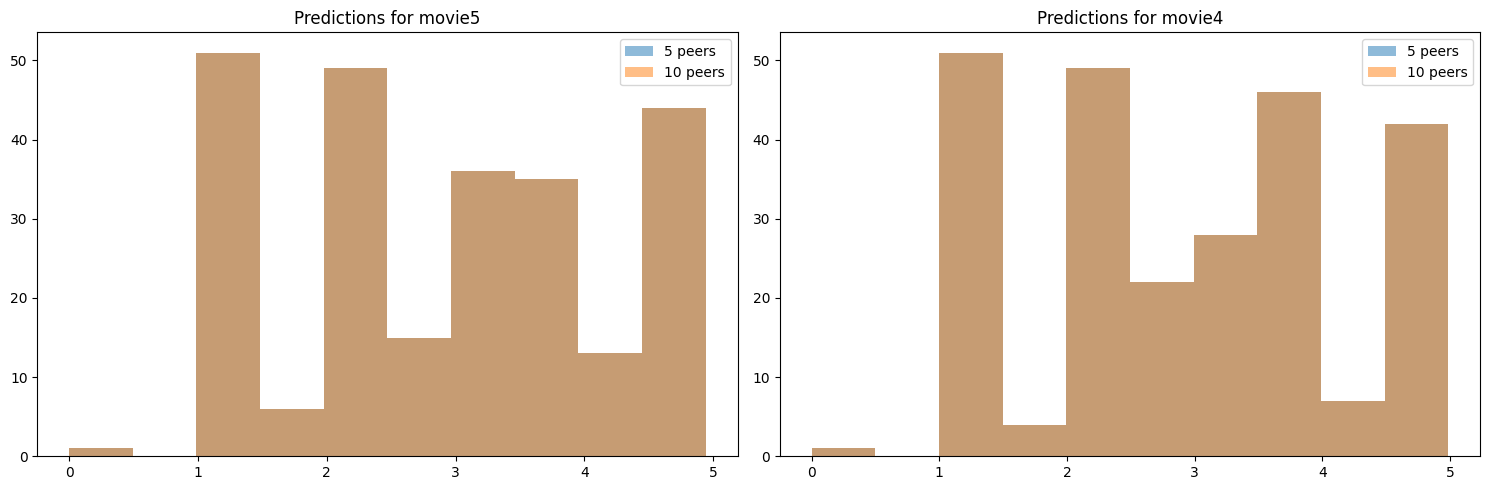

Please make sure both Part 1 and Part 2 analyses have been run.


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def pca_mle_analysis(df, i1, i2):
    """
    PCA analysis using Maximum Likelihood Estimation
    """
    # Remove userid column and convert to numpy array
    ratings = df.iloc[:, 1:].values
    
    # 3.3.1 Generate covariance matrix using MLE
    n_items = ratings.shape[1]
    cov_matrix = np.zeros((n_items, n_items))
    
    for i in range(n_items):
        for j in range(n_items):
            # Get common users (specified entries)
            common_mask = ~(np.isnan(ratings[:, i]) | np.isnan(ratings[:, j]))
            if np.sum(common_mask) > 0:
                # Calculate covariance using only specified entries
                item_i = ratings[common_mask, i]
                item_j = ratings[common_mask, j]
                cov_matrix[i, j] = np.cov(item_i, item_j)[0, 1]
            else:
                cov_matrix[i, j] = 0
    
    # Visualize covariance matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cov_matrix, annot=True, cmap='coolwarm')
    plt.title('MLE Covariance Matrix')
    plt.show()
    
    # 3.3.2 Determine top 5 and 10 peers
    def get_top_peers(item_idx, n_peers):
        similarities = np.abs(cov_matrix[item_idx])
        similarities[item_idx] = -1  # Exclude self from peers
        return np.argsort(similarities)[-n_peers:][::-1]
    
    # Get indices for target items
    i1_idx = df.columns.get_loc(i1) - 1
    i2_idx = df.columns.get_loc(i2) - 1
    
    top_5_peers = {
        i1: get_top_peers(i1_idx, 5),
        i2: get_top_peers(i2_idx, 5)
    }
    
    top_10_peers = {
        i1: get_top_peers(i1_idx, 10),
        i2: get_top_peers(i2_idx, 10)
    }
    
    # 3.3.3 Determine reduced dimensional space for 5 peers
    def compute_reduced_space(data, peers):
        return data[:, peers]
    
    reduced_space_5 = {
        i1: compute_reduced_space(ratings, top_5_peers[i1]),
        i2: compute_reduced_space(ratings, top_5_peers[i2])
    }
    
    # 3.3.4 Compute predictions using 5 peers
    def compute_predictions(reduced_space, cov_values):
        weights = np.abs(cov_values)
        weights = weights / np.sum(weights)  # Normalize weights
        
        predictions = np.zeros(reduced_space.shape[0])
        for i in range(reduced_space.shape[0]):
            valid_mask = ~np.isnan(reduced_space[i])
            if np.any(valid_mask):
                predictions[i] = np.average(reduced_space[i][valid_mask], 
                                         weights=weights[valid_mask])
        return predictions
    
    predictions_5 = {
        i1: compute_predictions(reduced_space_5[i1], cov_matrix[i1_idx, top_5_peers[i1]]),
        i2: compute_predictions(reduced_space_5[i2], cov_matrix[i2_idx, top_5_peers[i2]])
    }
    
    # 3.3.5 Determine reduced dimensional space for 10 peers
    reduced_space_10 = {
        i1: compute_reduced_space(ratings, top_10_peers[i1]),
        i2: compute_reduced_space(ratings, top_10_peers[i2])
    }
    
    # 3.3.6 Compute predictions using 10 peers
    predictions_10 = {
        i1: compute_predictions(reduced_space_10[i1], cov_matrix[i1_idx, top_10_peers[i1]]),
        i2: compute_predictions(reduced_space_10[i2], cov_matrix[i2_idx, top_10_peers[i2]])
    }
    
    # 3.3.7 Compare results (5 vs 10 peers)
    comparison_5_10 = {
        i1: {
            '5_peers_mean': np.nanmean(predictions_5[i1]),
            '10_peers_mean': np.nanmean(predictions_10[i1]),
            'difference': np.nanmean(predictions_5[i1]) - np.nanmean(predictions_10[i1])
        },
        i2: {
            '5_peers_mean': np.nanmean(predictions_5[i2]),
            '10_peers_mean': np.nanmean(predictions_10[i2]),
            'difference': np.nanmean(predictions_5[i2]) - np.nanmean(predictions_10[i2])
        }
    }
    
    # Visualize predictions comparison
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(predictions_5[i1], alpha=0.5, label='5 peers')
    plt.hist(predictions_10[i1], alpha=0.5, label='10 peers')
    plt.title(f'Predictions for {i1}')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.hist(predictions_5[i2], alpha=0.5, label='5 peers')
    plt.hist(predictions_10[i2], alpha=0.5, label='10 peers')
    plt.title(f'Predictions for {i2}')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return {
        'covariance_matrix': cov_matrix,
        'top_5_peers': top_5_peers,
        'top_10_peers': top_10_peers,
        'reduced_space_5': reduced_space_5,
        'reduced_space_10': reduced_space_10,
        'predictions_5': predictions_5,
        'predictions_10': predictions_10,
        'comparison_5_10': comparison_5_10
    }

# Run the analysis
results_mle = pca_mle_analysis(df, i1, i2)

# Save detailed results
with open('part2_results.txt', 'w') as f:
    f.write("MLE-PCA Analysis Results\n\n")
    
    f.write("Covariance Matrix:\n")
    np.savetxt(f, results_mle['covariance_matrix'], fmt='%.4f')
    
    f.write("\nTop 5 Peers:\n")
    for item, peers in results_mle['top_5_peers'].items():
        f.write(f"{item}: {peers}\n")
    
    f.write("\nTop 10 Peers:\n")
    for item, peers in results_mle['top_10_peers'].items():
        f.write(f"{item}: {peers}\n")
    
    f.write("\nPredictions Comparison (5 vs 10 peers):\n")
    for item, comp in results_mle['comparison_5_10'].items():
        f.write(f"\n{item}:\n")
        f.write(f"5-peers mean: {comp['5_peers_mean']:.4f}\n")
        f.write(f"10-peers mean: {comp['10_peers_mean']:.4f}\n")
        f.write(f"Difference: {comp['difference']:.4f}\n")

# Assuming both analyses have been run and results are in memory
if 'results_part1' in globals() and 'results_mle' in globals():
    print("\nComparisons with Part 1:")
    
    # 3.3.8 Compare with 3.2.9 (5-peers)
    print("\nComparison of 5-peer predictions:")
    for item in [i1, i2]:
        mle_mean = np.nanmean(results_mle['predictions_5'][item])
        part1_mean = np.nanmean(results_part1['predictions_5'][item])
        diff = mle_mean - part1_mean
        print(f"{item}:")
        print(f"  MLE (Part 2): {mle_mean:.4f}")
        print(f"  Mean-Filling (Part 1): {part1_mean:.4f}")
        print(f"  Difference: {diff:.4f}")
    
    # 3.3.9 Compare with 3.2.11 (10-peers)
    print("\nComparison of 10-peer predictions:")
    for item in [i1, i2]:
        mle_mean = np.nanmean(results_mle['predictions_10'][item])
        part1_mean = np.nanmean(results_part1['predictions_10'][item])
        diff = mle_mean - part1_mean
        print(f"{item}:")
        print(f"  MLE (Part 2): {mle_mean:.4f}")
        print(f"  Mean-Filling (Part 1): {part1_mean:.4f}")
        print(f"  Difference: {diff:.4f}")
else:
    print("Please make sure both Part 1 and Part 2 analyses have been run.")

                                                                    PART3                                                                                 

Average ratings for each item: movie1    2.967078
movie2    2.947826
movie3    3.070485
movie4    2.917749
movie5    2.913793
dtype: float64
Vectors are orthogonal: True


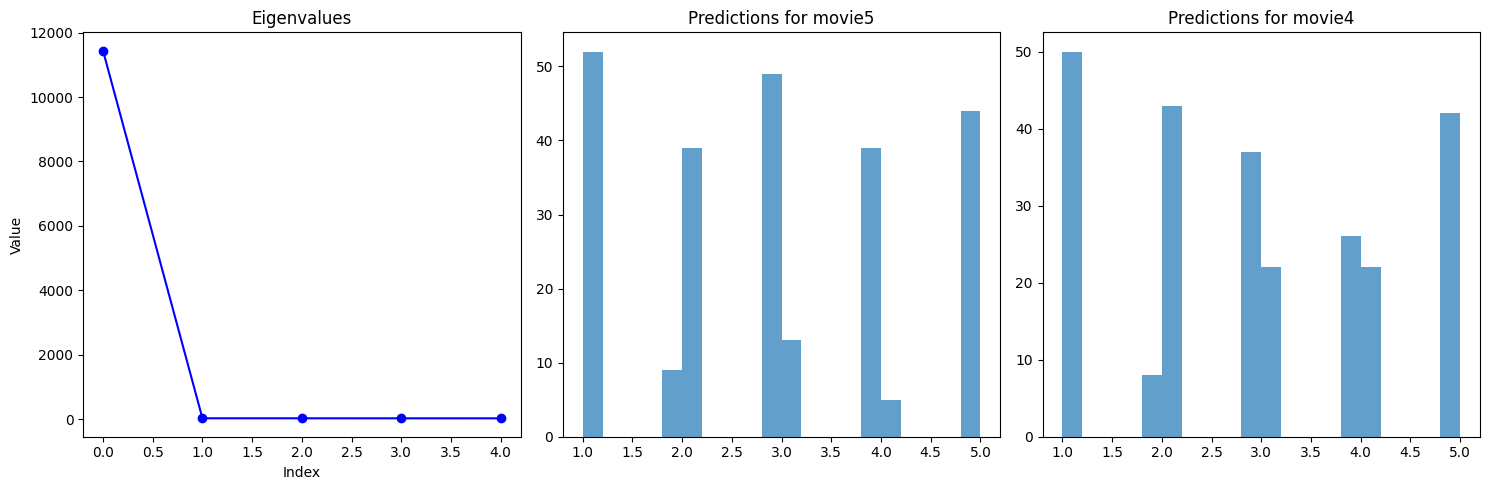

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def svd_analysis(df):
    # 3.4.1 Calculate average rating for each item
    item_means = df.iloc[:, 1:].mean()
    print("Average ratings for each item:", item_means)

    # 3.4.2 Mean-filling method
    df_filled = df.copy()
    for col in df_filled.iloc[:, 1:].columns:
        df_filled[col].fillna(item_means[col], inplace=True)

    # Convert to matrix A
    A = df_filled.iloc[:, 1:].values

    # 3.4.3 Compute eigenvalues and eigenvectors
    ATA = np.dot(A.T, A)
    eigenvalues, eigenvectors = np.linalg.eigh(ATA)
    
    # Sort in descending order
    idx = eigenvalues.argsort()[::-1]
    lambda_values = eigenvalues[idx]
    v_vectors = eigenvectors[:, idx]

    # 3.4.4 Check orthogonality
    def check_orthogonality(vectors):
        n = vectors.shape[1]
        for i in range(n):
            for j in range(i+1, n):
                dot_product = np.abs(np.dot(vectors[:,i], vectors[:,j]))
                if dot_product > 1e-10:
                    return False
        return True

    is_orthogonal = check_orthogonality(v_vectors)
    print("Vectors are orthogonal:", is_orthogonal)

    # 3.4.5 Vector Normalization if needed
    if not is_orthogonal:
        # Perform vector normalization
        for i in range(v_vectors.shape[1]):
            v_vectors[:,i] = v_vectors[:,i] / np.linalg.norm(v_vectors[:,i])

    # 3.4.6 Check orthonormality
    def check_orthonormality(vectors):
        if not check_orthogonality(vectors):
            return False
        for i in range(vectors.shape[1]):
            if abs(np.linalg.norm(vectors[:,i]) - 1) > 1e-10:
                return False
        return True

    # 3.4.7 Apply Gram-Schmidt method
    n = v_vectors.shape[1]
    u_bar_vectors = np.zeros_like(v_vectors)
    e_hat_vectors = np.zeros_like(v_vectors)
    sigma_values = np.zeros(n)
    u_hat_vectors = np.zeros((A.shape[0], n))

    # 3.4.7.1 First orthonormal vector
    u_bar_vectors[:,0] = v_vectors[:,0]
    
    # 3.4.7.2 Normalize u̅₁
    e_hat_vectors[:,0] = u_bar_vectors[:,0] / np.linalg.norm(u_bar_vectors[:,0])
    
    # 3.4.7.3 Assign highest eigenvalue
    sigma_values[0] = lambda_values[0]
    
    # 3.4.7.4 Calculate first predicted vector
    u_hat_vectors[:,0] = np.dot(A, e_hat_vectors[:,0]) / sigma_values[0]

    # Process remaining vectors
    for i in range(1, n):
        # 3.4.7.5 Calculate projection
        proj = np.dot(u_bar_vectors[:,0], v_vectors[:,i]) * u_bar_vectors[:,0]
        
        # 3.4.7.6 Construct new orthonormal vector
        u_bar_vectors[:,i] = v_vectors[:,i] - proj
        
        # 3.4.7.7 Normalize
        e_hat_vectors[:,i] = u_bar_vectors[:,i] / np.linalg.norm(u_bar_vectors[:,i])
        
        # 3.4.7.8 Calculate new eigenvalue using the exact formula
        numerator = np.dot(e_hat_vectors[:,i].T, np.dot(ATA, e_hat_vectors[:,i]))
        denominator = np.dot(e_hat_vectors[:,i].T, e_hat_vectors[:,i])
        sigma_values[i] = np.sqrt(numerator / denominator)
        
        # 3.4.7.9 Calculate new predicted vector
        u_hat_vectors[:,i] = np.dot(A, e_hat_vectors[:,i]) / sigma_values[i]

    # 3.4.8 Construct Σ̂ matrix
    Sigma_hat = np.diag(sigma_values)

    # 3.4.9 Construct V̂ matrix
    V_hat = e_hat_vectors

    # 3.4.10 Construct Û matrix
    U_hat = u_hat_vectors

    # 3.4.11 Construct R̂ = ÛΣ̂V̂ᵀ
    R_hat = np.dot(np.dot(U_hat, Sigma_hat), V_hat.T)

    # 3.4.12 Find missing ratings for target items
    predictions = {
        i1: R_hat[:, df.columns.get_loc(i1) - 1],
        i2: R_hat[:, df.columns.get_loc(i2) - 1]
    }

    # Visualizations
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.plot(sigma_values, 'bo-')
    plt.title('Eigenvalues')
    plt.xlabel('Index')
    plt.ylabel('Value')
    
    plt.subplot(1, 3, 2)
    plt.hist(predictions[i1], bins=20, alpha=0.7)
    plt.title(f'Predictions for {i1}')
    
    plt.subplot(1, 3, 3)
    plt.hist(predictions[i2], bins=20, alpha=0.7)
    plt.title(f'Predictions for {i2}')
    
    plt.tight_layout()
    plt.show()

    return {
        'item_means': item_means,
        'eigenvalues': sigma_values,
        'U_hat': U_hat,
        'Sigma_hat': Sigma_hat,
        'V_hat': V_hat,
        'R_hat': R_hat,
        'predictions': predictions
    }

# Run the analysis
results_svd = svd_analysis(df)

# Save results
with open('svd_results.txt', 'w') as f:
    f.write("SVD Analysis Results\n\n")
    f.write("Item Means:\n")
    f.write(str(results_svd['item_means']))
    f.write("\n\nEigenvalues:\n")
    f.write(str(results_svd['eigenvalues']))
    f.write("\n\nPredictions for Target Items:\n")
    for item in [i1, i2]:
        mean_pred = np.mean(results_svd['predictions'][item])
        std_pred = np.std(results_svd['predictions'][item])
        f.write(f"\n{item}:\n")
        f.write(f"Mean: {mean_pred:.4f}\n")
        f.write(f"Std: {std_pred:.4f}\n")